# WELCOME!

In this project, you must apply EDA processes for the development of predictive models. Handling outliers, domain knowledge and feature engineering will be challenges.

Also, this project aims to improve your ability to implement algorithms for Multi-Class Classification. Thus, you will have the opportunity to implement many algorithms commonly used for Multi-Class Classification problems.

Before diving into the project, please take a look at the determines and tasks.

# Determines

The 2012 US Army Anthropometric Survey (ANSUR II) was executed by the Natick Soldier Research, Development and Engineering Center (NSRDEC) from October 2010 to April 2012 and is comprised of personnel representing the total US Army force to include the US Army Active Duty, Reserves, and National Guard. In addition to the anthropometric and demographic data described below, the ANSUR II database also consists of 3D whole body, foot, and head scans of Soldier participants. These 3D data are not publicly available out of respect for the privacy of ANSUR II participants. The data from this survey are used for a wide range of equipment design, sizing, and tariffing applications within the military and has many potential commercial, industrial, and academic applications.

The ANSUR II working databases contain 93 anthropometric measurements which were directly measured, and 15 demographic/administrative variables explained below. The ANSUR II Male working database contains a total sample of 4,082 subjects. The ANSUR II Female working database contains a total sample of 1,986 subjects.


DATA DICT:
https://data.world/datamil/ansur-ii-data-dictionary/workspace/file?filename=ANSUR+II+Databases+Overview.pdf

---

To achieve high prediction success, you must understand the data well and develop different approaches that can affect the dependent variable.

Firstly, try to understand the dataset column by column using pandas module. Do research within the scope of domain (body scales, and race characteristics) knowledge on the internet to get to know the data set in the fastest way. 

You will implement ***Logistic Regression, Support Vector Machine, XGBoost, Random Forest*** algorithms. Also, evaluate the success of your models with appropriate performance metrics.

At the end of the project, choose the most successful model and try to enhance the scores with ***SMOTE*** make it ready to deploy. Furthermore, use ***SHAP*** to explain how the best model you choose works.

# Tasks

#### 1. Exploratory Data Analysis (EDA)
- Import Libraries, Load Dataset, Exploring Data

    *i. Import Libraries*
    
    *ii. Ingest Data *
    
    *iii. Explore Data*
    
    *iv. Outlier Detection*
    
    *v.  Drop unnecessary features*

#### 2. Data Preprocessing
- Scale (if needed)
- Separete the data frame for evaluation purposes

#### 3. Multi-class Classification
- Import libraries
- Implement SVM Classifer
- Implement Decision Tree Classifier
- Implement Random Forest Classifer
- Implement XGBoost Classifer
- Compare The Models



# EDA
- Drop unnecessary colums
- Drop DODRace class if value count below 500 (we assume that our data model can't learn if it is below 500)

## Import Libraries
Besides Numpy and Pandas, you need to import the necessary modules for data visualization, data preprocessing, Model building and tuning.

*Note: Check out the course materials.*

## Ingest Data from links below and make a dataframe
- Soldiers Male : https://query.data.world/s/h3pbhckz5ck4rc7qmt2wlknlnn7esr
- Soldiers Female : https://query.data.world/s/sq27zz4hawg32yfxksqwijxmpwmynq

# EDA
- Drop unnecessary colums
- Drop DODRace class if value count below 500 (we assume that our data model can't learn if it is below 500)

# DATA Preprocessing
- In this step we divide our data to X(Features) and y(Target) then ,
- To train and evaluation purposes we create train and test sets,
- Lastly, scale our data if features not in same scale. Why?

# Modelling
- Fit the model with train dataset
- Get predict from vanilla model on both train and test sets to examine if there is over/underfitting   
- Apply GridseachCV for both hyperparemeter tuning and sanity test of our model.
- Use hyperparameters that you find from gridsearch and make final prediction and evaluate the result according to chosen metric.

## 1. Logistic model

### Vanilla Logistic Model

Vanilla modelin anlami; default degerler ile model kurulmasidir.

### Logistic Model GridsearchCV

## Lojistic Regression solver "liblenear" for small dataset

__liblenear__ kucuk datasetlerinde iyi sonuclar verir. Dikkat edilmesi gereken husus; liblinear sadece __penalty="l1"__ ile calisir, yoksa hata verir.

## 2. SVC

### Vanilla SVC model 

Vanilla modellerde default degerler verilmeli ama dengesiz bir datasetimiz oldugu icin  class_weight düşünülmeli

###  SVC Model GridsearchCV

## 3. RF

### Vanilla RF Model

### RF Model GridsearchCV

## 4. XGBoost

### Vanilla XGBoost Model

### XGBoost Model GridsearchCV

## Comparing Models

# Before the Deployment 
- Choose the model that works best based on your chosen metric
- For final step, fit the best model with whole dataset to get better performance.
- And your model ready to deploy, dump your model and scaler.

- Evaluation metrics 
https://towardsdatascience.com/comprehensive-guide-on-multiclass-classification-metrics-af94cfb83fbd

## Altta yazılı olan başlıklar ile ilgili domain knowledge yapılarak çözüme gelinmeli

# SMOTE
https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

Yukaridaki makale Smote islemini detayli bir sekilde anlatiyor. 

##  Smote implement

__Smote__ -----> Dengesiz data setlerinde datadaki en buyuk gozlem sayisi hangi class' a ait ise diger class' larin gozlem sayisini da ona esitler. Mesela datamizdaki en buyuk gozlem sayisi White = 3034 idi. Smote islemi uygulandiginda diger class' lardaki gozlem sayilari da buna esitlenir. Dengesiz datasetlerinde mutlaka denenmelidir :

## Logistic Regression Over/Under Sampling

#  SHAP

https://towardsdatascience.com/shap-explain-any-machine-learning-model-in-python-24207127cad7

## Shap values for all data

## SMOTE for X3 dataset

## Find the best threshold for multiclassification

In [62]:
# EDA için kütüphaneler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
import cufflinks as cf

from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
cf.go_offline()

# Grafikleri göstermek için
%matplotlib inline
plt.rcParams['figure.figsize'] = 10, 6

# Makine öğrenmesi algoritmaları, veri ön işleme ve değerlendirme için sklearn kütüphanesi
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import log_loss, recall_score, accuracy_score, precision_score, f1_score,classification_report,confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score, auc

# Uyarılardan kurtulmak için
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

In [2]:
df1 = pd.read_csv('ANSUR II MALE Public.csv',encoding='latin-1')
df2 = pd.read_csv('ANSUR II FEMALE Public.csv',encoding='latin-1')

In [3]:
len([(i,j) for i,j in zip(df1.columns,df2.columns)])

108

In [4]:
pd.DataFrame({'Male':df1.columns,'Female':df2.columns} )

,Male,Female
0,subjectid,SubjectId
1,abdominalextensiondepthsitting,abdominalextensiondepthsitting
2,acromialheight,acromialheight
3,acromionradialelength,acromionradialelength
4,anklecircumference,anklecircumference
...,...,...
103,DODRace,DODRace
104,Age,Age
105,Heightin,Heightin
106,Weightlbs,Weightlbs


In [5]:
df2.rename({**{j:i for i,j in zip(df1.columns,df2.columns)}},inplace=True,axis=1) #cool keep in mind axis =1 

In [6]:
df = df1.append(df2)

In [7]:
df.reset_index(inplace=True) #in case of you didnt reset index df returnS many duplicated index values
df                           #that lead lots of slicing problem -- df = df1.append(df2)

,index,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,...,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,0,10027,266,1467,337,222,1347,253,202,401,...,Combat Arms,19D,North Dakota,1,NaN,1,41,71,180,Right hand
1,1,10032,233,1395,326,220,1293,245,193,394,...,Combat Support,68W,New York,1,NaN,1,35,68,160,Left hand
2,2,10033,287,1430,341,230,1327,256,196,427,...,Combat Support,68W,New York,2,NaN,2,42,68,205,Left hand
3,3,10092,234,1347,310,230,1239,262,199,401,...,Combat Service Support,88M,Wisconsin,1,NaN,1,31,66,175,Right hand
4,4,10093,250,1585,372,247,1478,267,224,435,...,Combat Service Support,92G,North Carolina,2,NaN,2,21,77,213,Right hand
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6063,1981,29501,285,1392,335,223,1297,252,196,368,...,Combat Support,42A,Texas,3,Mexican,3,51,67,180,Right hand
6064,1982,29502,262,1324,301,202,1204,236,181,378,...,Combat Support,25U,Texas,3,Mexican,3,40,63,150,Right hand
6065,1983,29503,260,1334,318,213,1259,234,183,363,...,Combat Support,42A,Texas,2,NaN,2,40,66,168,Right hand
6066,1984,29511,205,1293,302,199,1207,213,163,376,...,Combat Support,92Y,Texas,3,Mexican,3,31,63,133,Right hand


In [8]:
{'unique values of '+str(i):df[i].nunique() for i in df.columns}

{'unique values of index': 4082,
 'unique values of subjectid': 6068,
 'unique values of abdominalextensiondepthsitting': 218,
 'unique values of acromialheight': 432,
 'unique values of acromionradialelength': 133,
 'unique values of anklecircumference': 112,
 'unique values of axillaheight': 402,
 'unique values of balloffootcircumference': 107,
 'unique values of balloffootlength': 86,
 'unique values of biacromialbreadth': 169,
 'unique values of bicepscircumferenceflexed': 237,
 'unique values of bicristalbreadth': 132,
 'unique values of bideltoidbreadth': 244,
 'unique values of bimalleolarbreadth': 37,
 'unique values of bitragionchinarc': 107,
 'unique values of bitragionsubmandibulararc': 125,
 'unique values of bizygomaticbreadth': 50,
 'unique values of buttockcircumference': 429,
 'unique values of buttockdepth': 161,
 'unique values of buttockheight': 322,
 'unique values of buttockkneelength': 209,
 'unique values of buttockpopliteallength': 185,
 'unique values of calfc

In [9]:
df['Installation'].value_counts()

Camp Shelby       1160
Fort Bliss         963
Fort Gordon        669
Fort McCoy         452
Camp Atterbury     441
Fort Hood          439
Fort Huachuca      436
Fort Bragg         397
Fort Drum          391
Fort Lee           380
Fort Stewart       339
Fort Rucker          1
Name: Installation, dtype: int64

In [10]:
list(df['PrimaryMOS'].value_counts().index)

['11B',
 '88M',
 '92A',
 '91B',
 '68W',
 '92Y',
 '42A',
 '25U',
 '31B',
 '25B',
 '12B',
 '13B',
 '35D',
 '35M',
 '74D',
 '19D',
 '92G',
 '92F',
 '25Q',
 '35F',
 '91D',
 '25S',
 '25L',
 '11C',
 '25A',
 '19K',
 '25N',
 '12N',
 '13D',
 '11A',
 '13F',
 '91C',
 '35G',
 '92W',
 '94F',
 '90A',
 '91J',
 '91A',
 '94E',
 '89B',
 '36B',
 '91H',
 '92S',
 '21B',
 '91L',
 '35T',
 '68A',
 '88N',
 '27D',
 '11Z',
 '68E',
 '25W',
 '92M',
 '12C',
 '12W',
 '56M',
 '15T',
 '25P',
 '13A',
 '70B',
 '91X',
 '68J',
 '35N',
 '68K',
 '35P',
 '31E',
 '13R',
 '14J',
 '66H',
 '88Z',
 '35L',
 '88A',
 '15W',
 '15P',
 '35X',
 '25C',
 '91E',
 '13Z',
 '351L',
 '31A',
 '14Z',
 '12R',
 '14T',
 '14E',
 '12Y',
 '12H',
 '351M',
 '251A',
 '42B',
 '56A',
 '350F',
 '68P',
 '19Z',
 '91F',
 '92R',
 '92Z',
 '12M',
 '21C',
 '14S',
 '35Z',
 '91K',
 '68X',
 '25X',
 '89A',
 '25F',
 '21E',
 '915A',
 '27A',
 '13M',
 '94R',
 '91P',
 '91Z',
 '15G',
 '79S',
 '94M',
 '12K',
 '15E',
 '920A',
 '12A',
 '91M',
 '46Q',
 '63B',
 '68S',
 '12Z',
 '

In [11]:
df.Ethnicity

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
         ...   
6063    Mexican
6064    Mexican
6065        NaN
6066    Mexican
6067    Mexican
Name: Ethnicity, Length: 6068, dtype: object

In [12]:
{i: df[i].dtype for i in df.columns}

{'index': dtype('int64'),
 'subjectid': dtype('int64'),
 'abdominalextensiondepthsitting': dtype('int64'),
 'acromialheight': dtype('int64'),
 'acromionradialelength': dtype('int64'),
 'anklecircumference': dtype('int64'),
 'axillaheight': dtype('int64'),
 'balloffootcircumference': dtype('int64'),
 'balloffootlength': dtype('int64'),
 'biacromialbreadth': dtype('int64'),
 'bicepscircumferenceflexed': dtype('int64'),
 'bicristalbreadth': dtype('int64'),
 'bideltoidbreadth': dtype('int64'),
 'bimalleolarbreadth': dtype('int64'),
 'bitragionchinarc': dtype('int64'),
 'bitragionsubmandibulararc': dtype('int64'),
 'bizygomaticbreadth': dtype('int64'),
 'buttockcircumference': dtype('int64'),
 'buttockdepth': dtype('int64'),
 'buttockheight': dtype('int64'),
 'buttockkneelength': dtype('int64'),
 'buttockpopliteallength': dtype('int64'),
 'calfcircumference': dtype('int64'),
 'cervicaleheight': dtype('int64'),
 'chestbreadth': dtype('int64'),
 'chestcircumference': dtype('int64'),
 'chestde

In [13]:
df.isnull().sum()[df.isnull().sum()>0]

Ethnicity    4647
dtype: int64

In [14]:
list(df.select_dtypes('int64').columns)

['index',
 'subjectid',
 'abdominalextensiondepthsitting',
 'acromialheight',
 'acromionradialelength',
 'anklecircumference',
 'axillaheight',
 'balloffootcircumference',
 'balloffootlength',
 'biacromialbreadth',
 'bicepscircumferenceflexed',
 'bicristalbreadth',
 'bideltoidbreadth',
 'bimalleolarbreadth',
 'bitragionchinarc',
 'bitragionsubmandibulararc',
 'bizygomaticbreadth',
 'buttockcircumference',
 'buttockdepth',
 'buttockheight',
 'buttockkneelength',
 'buttockpopliteallength',
 'calfcircumference',
 'cervicaleheight',
 'chestbreadth',
 'chestcircumference',
 'chestdepth',
 'chestheight',
 'crotchheight',
 'crotchlengthomphalion',
 'crotchlengthposterioromphalion',
 'earbreadth',
 'earlength',
 'earprotrusion',
 'elbowrestheight',
 'eyeheightsitting',
 'footbreadthhorizontal',
 'footlength',
 'forearmcenterofgriplength',
 'forearmcircumferenceflexed',
 'forearmforearmbreadth',
 'forearmhandlength',
 'functionalleglength',
 'handbreadth',
 'handcircumference',
 'handlength',
 

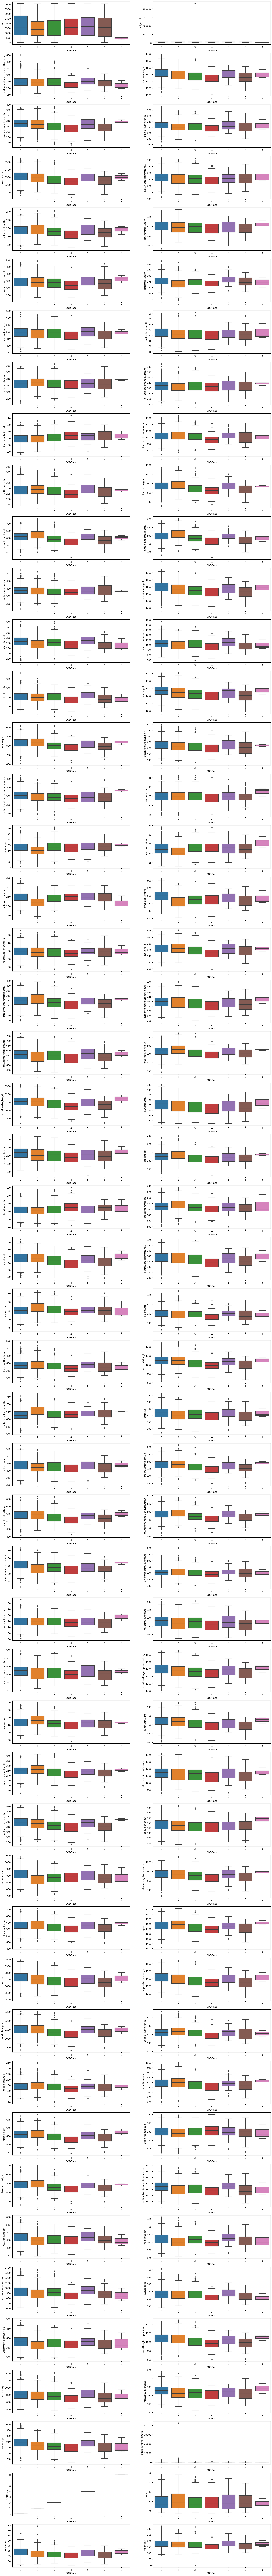

In [15]:
index = 0
plt.figure(figsize=(20,200))
for feature in list(df.select_dtypes('int64').columns):    
    index += 1
    plt.subplot(50,2,index)
    sns.boxplot(x='DODRace',y=feature,data=df)
plt.show()

In [16]:
df.iloc[:,range(99)].info() #we hhave got over 100 columns so info at most return 100 columned df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6068 entries, 0 to 6067
Data columns (total 99 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   index                           6068 non-null   int64 
 1   subjectid                       6068 non-null   int64 
 2   abdominalextensiondepthsitting  6068 non-null   int64 
 3   acromialheight                  6068 non-null   int64 
 4   acromionradialelength           6068 non-null   int64 
 5   anklecircumference              6068 non-null   int64 
 6   axillaheight                    6068 non-null   int64 
 7   balloffootcircumference         6068 non-null   int64 
 8   balloffootlength                6068 non-null   int64 
 9   biacromialbreadth               6068 non-null   int64 
 10  bicepscircumferenceflexed       6068 non-null   int64 
 11  bicristalbreadth                6068 non-null   int64 
 12  bideltoidbreadth                6068 non-null   

In [17]:



len(df.columns)+1

110

In [18]:
pd.DataFrame(df.iloc[:,range(99,len(df.columns))]).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6068 entries, 0 to 6067
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Branch                 6068 non-null   object
 1   PrimaryMOS             6068 non-null   object
 2   SubjectsBirthLocation  6068 non-null   object
 3   SubjectNumericRace     6068 non-null   int64 
 4   Ethnicity              1421 non-null   object
 5   DODRace                6068 non-null   int64 
 6   Age                    6068 non-null   int64 
 7   Heightin               6068 non-null   int64 
 8   Weightlbs              6068 non-null   int64 
 9   WritingPreference      6068 non-null   object
dtypes: int64(5), object(5)
memory usage: 474.2+ KB


In [19]:
set(list(df.Ethnicity.value_counts(dropna=False).index))

{'Aboriginal Guyanese',
 'Algonquin Navajo Penobscot',
 'Apache',
 'Apache Blackfoot',
 'Apache Blackfoot Cherokee Crow',
 'Apache Cherokee',
 'Apache Kiowa Mexican',
 'Apache Mexican',
 'Arab or Middle Eastern',
 'Arab or Middle Eastern Caribbean Islander Cherokee',
 'Arab or Middle Eastern Cuban',
 'Arab or Middle Eastern Honduran',
 'Arab or Middle Eastern Venezuelan',
 'Argentine',
 'Argentine Brazilian',
 'Argentine Mexican',
 'Armenian',
 'Azorean',
 'Aztec Mexican',
 'Belizean',
 'Belizean Dominican',
 'Blackfoot',
 'Blackfoot Caribbean Islander Puerto Rican',
 'Blackfoot Cherokee',
 'Blackfoot Cherokee Choctaw',
 'Blackfoot Cherokee Shawnee',
 'Blackfoot Choctaw Sioux',
 'Blackfoot Mexican',
 'Blackfoot Puerto Rican',
 'Blackfoot Shawnee',
 'Bolivian',
 'Brazilian',
 'Burmese',
 'Caddo Cheyenne Mexican',
 'Cambodian',
 'Cambodian Vietnamese',
 'Cape Verdean',
 'Caribbean Islander',
 'Caribbean Islander Cherokee',
 'Caribbean Islander Chinese East/Asian Indian',
 'Caribbean Isla

In [20]:
[i==j for i,j in zip(df.DODRace,df.SubjectNumericRace)] #check are there any rows dosent match up in those columns

[True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 T

In [21]:
len(*np.where(df.DODRace!=df.SubjectNumericRace)) #indexes of the expression DODRace and SubjectNumericRace do not match up

806

In [22]:
index = np.where(df.DODRace!=df.SubjectNumericRace)
list(index[0])

[10,
 27,
 36,
 56,
 64,
 71,
 79,
 111,
 118,
 120,
 126,
 148,
 150,
 151,
 157,
 163,
 169,
 176,
 188,
 196,
 203,
 210,
 212,
 232,
 247,
 262,
 264,
 268,
 290,
 301,
 312,
 313,
 315,
 317,
 321,
 323,
 326,
 328,
 338,
 345,
 355,
 358,
 383,
 386,
 387,
 388,
 392,
 394,
 410,
 415,
 420,
 423,
 424,
 449,
 450,
 455,
 459,
 471,
 473,
 475,
 487,
 504,
 505,
 506,
 514,
 523,
 527,
 528,
 537,
 543,
 551,
 555,
 557,
 560,
 563,
 564,
 565,
 574,
 575,
 591,
 603,
 604,
 608,
 614,
 645,
 648,
 653,
 654,
 669,
 674,
 678,
 695,
 721,
 736,
 739,
 743,
 746,
 749,
 752,
 762,
 783,
 790,
 802,
 828,
 833,
 835,
 849,
 869,
 873,
 879,
 887,
 896,
 902,
 907,
 910,
 911,
 916,
 935,
 936,
 938,
 960,
 963,
 964,
 966,
 977,
 978,
 987,
 1029,
 1058,
 1076,
 1079,
 1081,
 1094,
 1096,
 1097,
 1113,
 1116,
 1119,
 1148,
 1152,
 1153,
 1154,
 1177,
 1183,
 1200,
 1209,
 1237,
 1252,
 1294,
 1297,
 1347,
 1364,
 1368,
 1371,
 1372,
 1377,
 1398,
 1405,
 1410,
 1417,
 1418,
 1428,


In [23]:
df.loc[index[0] ,'DODRace'].value_counts() 
#Black are the first group misinformate about tehir race 2nd white 3rd Hispanic 4th asian

#this is normal so ultimately  those communities form a alrge amount of population

2    273
1    238
3    157
4     80
5     33
6     22
8      3
Name: DODRace, dtype: int64

In [24]:
df.loc[index[0] ,['Ethnicity','DODRace']].value_counts()

Ethnicity              DODRace
Caribbean Islander     2          118
Mexican                3           80
Cherokee               1           46
Mexican                1           39
Filipino               4           28
                                 ... 
Chippewa               5            1
Chippewa Mexican       3            1
Chippewa Narragansett  1            1
Choctaw                2            1
Western Cherokee       1            1
Length: 226, dtype: int64

In [25]:
df.corr()[df.corr()>0.6]

,index,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,...,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,SubjectNumericRace,DODRace,Age,Heightin,Weightlbs
index,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
subjectid,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
abdominalextensiondepthsitting,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.825714,NaN,NaN,NaN,NaN,NaN,NaN,0.793634
acromialheight,NaN,NaN,NaN,1.000000,0.872475,NaN,0.987452,0.693403,0.802922,0.735565,...,0.604967,0.933248,0.684610,0.734622,0.922687,NaN,NaN,NaN,0.944577,0.702188
acromionradialelength,NaN,NaN,NaN,0.872475,1.000000,NaN,0.862074,0.605970,0.734323,0.672158,...,NaN,0.851464,0.603964,0.646149,0.684979,NaN,NaN,NaN,0.831055,0.620289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SubjectNumericRace,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
DODRace,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
Age,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
Heightin,NaN,NaN,NaN,0.944577,0.831055,NaN,0.939310,0.691724,0.797004,0.756733,...,NaN,0.905858,0.636173,0.733900,0.854877,NaN,NaN,NaN,1.000000,0.659988


In [26]:
df.head(1)

,index,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,...,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,0,10027,266,1467,337,222,1347,253,202,401,...,Combat Arms,19D,North Dakota,1,NaN,1,41,71,180,Right hand


In [27]:
list(df.columns)

['index',
 'subjectid',
 'abdominalextensiondepthsitting',
 'acromialheight',
 'acromionradialelength',
 'anklecircumference',
 'axillaheight',
 'balloffootcircumference',
 'balloffootlength',
 'biacromialbreadth',
 'bicepscircumferenceflexed',
 'bicristalbreadth',
 'bideltoidbreadth',
 'bimalleolarbreadth',
 'bitragionchinarc',
 'bitragionsubmandibulararc',
 'bizygomaticbreadth',
 'buttockcircumference',
 'buttockdepth',
 'buttockheight',
 'buttockkneelength',
 'buttockpopliteallength',
 'calfcircumference',
 'cervicaleheight',
 'chestbreadth',
 'chestcircumference',
 'chestdepth',
 'chestheight',
 'crotchheight',
 'crotchlengthomphalion',
 'crotchlengthposterioromphalion',
 'earbreadth',
 'earlength',
 'earprotrusion',
 'elbowrestheight',
 'eyeheightsitting',
 'footbreadthhorizontal',
 'footlength',
 'forearmcenterofgriplength',
 'forearmcircumferenceflexed',
 'forearmforearmbreadth',
 'forearmhandlength',
 'functionalleglength',
 'handbreadth',
 'handcircumference',
 'handlength',
 

In [28]:
X = df.drop([
 'index','subjectid','Date','Installation',
 'Component',
 'Branch',
 'PrimaryMOS',
 'SubjectsBirthLocation',
 'SubjectNumericRace',
 'Ethnicity','DODRace'],axis=1)

In [29]:
y = df['DODRace']

In [30]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6068 entries, 0 to 6067
Data columns (total 98 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   abdominalextensiondepthsitting  6068 non-null   int64 
 1   acromialheight                  6068 non-null   int64 
 2   acromionradialelength           6068 non-null   int64 
 3   anklecircumference              6068 non-null   int64 
 4   axillaheight                    6068 non-null   int64 
 5   balloffootcircumference         6068 non-null   int64 
 6   balloffootlength                6068 non-null   int64 
 7   biacromialbreadth               6068 non-null   int64 
 8   bicepscircumferenceflexed       6068 non-null   int64 
 9   bicristalbreadth                6068 non-null   int64 
 10  bideltoidbreadth                6068 non-null   int64 
 11  bimalleolarbreadth              6068 non-null   int64 
 12  bitragionchinarc                6068 non-null   

In [31]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder,OrdinalEncoder,LabelEncoder,MinMaxScaler

In [32]:
cat_onehot = ['Gender','WritingPreference']

In [33]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

column_trans = make_column_transformer((OneHotEncoder(handle_unknown="ignore", sparse=False), cat_onehot),                  
                                       remainder='passthrough') 

In [34]:
X=column_trans.fit_transform(X)

In [35]:
cat_name = column_trans.get_feature_names_out()

In [36]:
X= pd.DataFrame(X, columns=cat_name)
X.head()

,onehotencoder__Gender_Female,onehotencoder__Gender_Male,onehotencoder__WritingPreference_Either hand (No preference),onehotencoder__WritingPreference_Left hand,onehotencoder__WritingPreference_Right hand,remainder__abdominalextensiondepthsitting,remainder__acromialheight,remainder__acromionradialelength,remainder__anklecircumference,remainder__axillaheight,...,remainder__waistcircumference,remainder__waistdepth,remainder__waistfrontlengthsitting,remainder__waistheightomphalion,remainder__weightkg,remainder__wristcircumference,remainder__wristheight,remainder__Age,remainder__Heightin,remainder__Weightlbs
0,0.0,1.0,0.0,0.0,1.0,266.0,1467.0,337.0,222.0,1347.0,...,933.0,240.0,440.0,1054.0,815.0,175.0,853.0,41.0,71.0,180.0
1,0.0,1.0,0.0,1.0,0.0,233.0,1395.0,326.0,220.0,1293.0,...,870.0,225.0,371.0,1054.0,726.0,167.0,815.0,35.0,68.0,160.0
2,0.0,1.0,0.0,1.0,0.0,287.0,1430.0,341.0,230.0,1327.0,...,964.0,255.0,411.0,1041.0,929.0,180.0,831.0,42.0,68.0,205.0
3,0.0,1.0,0.0,0.0,1.0,234.0,1347.0,310.0,230.0,1239.0,...,857.0,205.0,399.0,968.0,794.0,176.0,793.0,31.0,66.0,175.0
4,0.0,1.0,0.0,0.0,1.0,250.0,1585.0,372.0,247.0,1478.0,...,868.0,214.0,379.0,1245.0,946.0,188.0,954.0,21.0,77.0,213.0


In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [60]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [38]:
sc = StandardScaler()

In [39]:
X_train.iloc[:,5:] = sc.fit_transform(X_train.iloc[:,5:])

In [40]:
X_test.iloc[:,5:] = sc.transform(X_test.iloc[:,5:])

## SVM

In [137]:
from sklearn.svm import SVC
svc = SVC(kernel='rbf')

In [138]:
svc.fit(X_train,y_train)

SVC()

In [139]:
y_pred = svc.predict(X_test)

In [140]:
eval_metric(svc, X_train, y_train, X_test, y_test)

Test_Set
[[752   5   8   1   0   0]
 [ 27 235   4   0   0   0]
 [ 98   7  21   0   0   0]
 [ 23   0   5   6   0   0]
 [  9   1   2   0   0   0]
 [  6   1   2   1   0   0]]
              precision    recall  f1-score   support

           1       0.82      0.98      0.89       766
           2       0.94      0.88      0.91       266
           3       0.50      0.17      0.25       126
           4       0.75      0.18      0.29        34
           5       0.00      0.00      0.00        12
           6       0.00      0.00      0.00        10

    accuracy                           0.84      1214
   macro avg       0.50      0.37      0.39      1214
weighted avg       0.80      0.84      0.80      1214


Train_Set
[[2996   18   11    1    0    0    0]
 [  64  962    6    0    0    0    0]
 [ 358   49  144    2    0    0    0]
 [  81    4   22   47    0    0    0]
 [  29    4    4    0    0    0    0]
 [  37    1    7    4    0    0    0]
 [   3    0    0    0    0    0    0]]
       

### SVM Grid Model

In [130]:

param_grid = {'C':np.linspace(1, 1.3, 10),
              'gamma':["scale", "auto"]
             }

In [131]:


# gridsearch içine neden cv=5 yazmadık ??
svm_model_grid = GridSearchCV(SVC(),
                              param_grid,
                              verbose=2,
                              scoring="accuracy",
                              n_jobs=-1)

svm_model_grid.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(estimator=SVC(), n_jobs=-1,
             param_grid={'C': array([1.        , 1.03333333, 1.06666667, 1.1       , 1.13333333,
       1.16666667, 1.2       , 1.23333333, 1.26666667, 1.3       ]),
                         'gamma': ['scale', 'auto']},
             scoring='accuracy', verbose=2)

In [132]:
svm_model_grid.best_params_

{'C': 1.3, 'gamma': 'scale'}

In [133]:
svm_model_grid.best_estimator_

SVC(C=1.3)

In [134]:
y_pred = svm_model_grid.predict(X_test)

In [135]:
eval_metric(svm_model_grid, X_train, y_train, X_test, y_test)

Test_Set
[[751   4   9   2   0   0]
 [ 26 232   8   0   0   0]
 [ 88   7  31   0   0   0]
 [ 20   0   5   9   0   0]
 [  9   1   2   0   0   0]
 [  5   2   1   2   0   0]]
              precision    recall  f1-score   support

           1       0.84      0.98      0.90       766
           2       0.94      0.87      0.91       266
           3       0.55      0.25      0.34       126
           4       0.69      0.26      0.38        34
           5       0.00      0.00      0.00        12
           6       0.00      0.00      0.00        10

    accuracy                           0.84      1214
   macro avg       0.50      0.39      0.42      1214
weighted avg       0.81      0.84      0.81      1214


Train_Set
[[2995   17   13    1    0    0    0]
 [  56  969    7    0    0    0    0]
 [ 325   49  177    2    0    0    0]
 [  69    4   22   59    0    0    0]
 [  29    4    4    0    0    0    0]
 [  35    1    9    4    0    0    0]
 [   3    0    0    0    0    0    0]]
       

In [146]:
param_grid = {'C':np.linspace(1, 1.3, 10),
              'kernel':['linear','sigmoid','rbf','poly'],
              'gamma':["scale", "auto"]
             }

In [148]:
svc_last_grid= GridSearchCV(SVC(),
                              param_grid,
                              verbose=2,
                              scoring="accuracy",
                              n_jobs=-1)

svc_last_grid.fit(X_train, y_train)

Fitting 5 folds for each of 80 candidates, totalling 400 fits


GridSearchCV(estimator=SVC(), n_jobs=-1,
             param_grid={'C': array([1.        , 1.03333333, 1.06666667, 1.1       , 1.13333333,
       1.16666667, 1.2       , 1.23333333, 1.26666667, 1.3       ]),
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'sigmoid', 'rbf', 'poly']},
             scoring='accuracy', verbose=2)

In [150]:
svc_last_grid.best_params_

{'C': 1.3, 'gamma': 'scale', 'kernel': 'rbf'}

In [149]:
eval_metric(svc_last_grid,X_train,y_train,X_test,y_test)

Test_Set
[[751   4   9   2   0   0]
 [ 26 232   8   0   0   0]
 [ 88   7  31   0   0   0]
 [ 20   0   5   9   0   0]
 [  9   1   2   0   0   0]
 [  5   2   1   2   0   0]]
              precision    recall  f1-score   support

           1       0.84      0.98      0.90       766
           2       0.94      0.87      0.91       266
           3       0.55      0.25      0.34       126
           4       0.69      0.26      0.38        34
           5       0.00      0.00      0.00        12
           6       0.00      0.00      0.00        10

    accuracy                           0.84      1214
   macro avg       0.50      0.39      0.42      1214
weighted avg       0.81      0.84      0.81      1214


Train_Set
[[2995   17   13    1    0    0    0]
 [  56  969    7    0    0    0    0]
 [ 325   49  177    2    0    0    0]
 [  69    4   22   59    0    0    0]
 [  29    4    4    0    0    0    0]
 [  35    1    9    4    0    0    0]
 [   3    0    0    0    0    0    0]]
       

## Logistic Regression

In [45]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()

In [46]:
log.fit(X_train,y_train)

LogisticRegression()

In [47]:
y_pred = log.predict(X_test)

In [48]:
accuracy_score(y_test,y_pred)

0.85667215815486

In [64]:
eval_metric(log, X_train, y_train, X_test, y_test)

Test_Set
[[740   5  17   3   0   1]
 [ 18 234  12   2   0   0]
 [ 65   9  49   3   0   0]
 [ 10   1   5  17   0   1]
 [  8   1   3   0   0   0]
 [  4   1   2   3   0   0]]
              precision    recall  f1-score   support

           1       0.88      0.97      0.92       766
           2       0.93      0.88      0.91       266
           3       0.56      0.39      0.46       126
           4       0.61      0.50      0.55        34
           5       0.00      0.00      0.00        12
           6       0.00      0.00      0.00        10

    accuracy                           0.86      1214
   macro avg       0.50      0.46      0.47      1214
weighted avg       0.83      0.86      0.84      1214


Train_Set
[[2912   32   74    7    0    1    0]
 [  57  958   17    0    0    0    0]
 [ 279   57  204   12    0    1    0]
 [  39    5   21   86    1    2    0]
 [  26    3    8    0    0    0    0]
 [  19    4    5   12    0    9    0]
 [   1    0    0    0    0    0    2]]
       

### Logistic Regression Grid Model

In [112]:
np.linspace(0, 1, 5) 

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

In [123]:
penalty = ["l1","l2"] 

C = np.linspace(0, 1, 5) 

class_weight= ["balanced", None] 

solver = ["lbfgs", "liblinear", "sag", "saga"] 


param_grid = {"penalty" : penalty,
              "C" : C, 
              "class_weight":class_weight,
             'solver':solver} 

grid_model = GridSearchCV(LogisticRegression(),
                          param_grid=param_grid,
                          cv=10,
                          scoring = 'accuracy', 
                          n_jobs = -1) 



In [124]:
grid_model.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([0.  , 0.25, 0.5 , 0.75, 1.  ]),
                         'class_weight': ['balanced', None],
                         'penalty': ['l1', 'l2'],
                         'solver': ['lbfgs', 'liblinear', 'sag', 'saga']},
             scoring='accuracy')

In [125]:
grid_model.get_params

<bound method BaseEstimator.get_params of GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([0.  , 0.25, 0.5 , 0.75, 1.  ]),
                         'class_weight': ['balanced', None],
                         'penalty': ['l1', 'l2'],
                         'solver': ['lbfgs', 'liblinear', 'sag', 'saga']},
             scoring='accuracy')>

In [129]:
grid_model.best_params_

{'C': 0.25, 'class_weight': None, 'penalty': 'l2', 'solver': 'saga'}

In [128]:
eval_metric(grid_model,X_train,y_train,X_test,y_test)

Test_Set
[[743   5  14   3   0   1]
 [ 19 235  11   1   0   0]
 [ 66   9  49   2   0   0]
 [ 10   1   6  16   0   1]
 [  8   1   3   0   0   0]
 [  4   2   1   3   0   0]]
              precision    recall  f1-score   support

           1       0.87      0.97      0.92       766
           2       0.93      0.88      0.91       266
           3       0.58      0.39      0.47       126
           4       0.64      0.47      0.54        34
           5       0.00      0.00      0.00        12
           6       0.00      0.00      0.00        10

    accuracy                           0.86      1214
   macro avg       0.50      0.45      0.47      1214
weighted avg       0.83      0.86      0.84      1214


Train_Set
[[2910   37   72    7    0    0    0]
 [  63  951   18    0    0    0    0]
 [ 283   54  206   10    0    0    0]
 [  42    6   24   81    0    1    0]
 [  27    3    7    0    0    0    0]
 [  18    4   10   13    0    4    0]
 [   2    1    0    0    0    0    0]]
       

## XGBoost

In [57]:
from xgboost import XGBClassifier
xg = XGBClassifier()

In [70]:
xg.fit(X_train,y_train.map({i:k for i,k in zip([1,2,3,4,5,6,8],[0,1,2,3,4,5,6])}))

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [72]:
y_pred = xg.predict(X_test)

In [73]:
accuracy_score(y_test.map({i:k for i,k in zip([1,2,3,4,5,6,8],[0,1,2,3,4,5,6])}),y_pred)

0.8270181219110379

In [75]:
eval_metric(xg,X_train,y_train.map({i:k for i,k in zip([1,2,3,4,5,6,8],[0,1,2,3,4,5,6])}), X_test, y_test.map({i:k for i,k in zip([1,2,3,4,5,6,8],[0,1,2,3,4,5,6])}))

Test_Set
[[749   5  12   0   0   0]
 [ 29 222  14   1   0   0]
 [ 88  10  26   2   0   0]
 [ 19   0   8   7   0   0]
 [  9   1   2   0   0   0]
 [  6   0   3   1   0   0]]
              precision    recall  f1-score   support

           0       0.83      0.98      0.90       766
           1       0.93      0.83      0.88       266
           2       0.40      0.21      0.27       126
           3       0.64      0.21      0.31        34
           4       0.00      0.00      0.00        12
           5       0.00      0.00      0.00        10

    accuracy                           0.83      1214
   macro avg       0.47      0.37      0.39      1214
weighted avg       0.79      0.83      0.80      1214


Train_Set
[[3026    0    0    0    0    0    0]
 [   0 1032    0    0    0    0    0]
 [   0    0  553    0    0    0    0]
 [   0    0    0  154    0    0    0]
 [   0    0    0    0   37    0    0]
 [   0    0    0    0    0   49    0]
 [   0    0    0    0    0    0    3]]
       

### XGBosst Grid Model

In [76]:
param_grid = {"n_estimators":[50, 100, 200],'max_depth':[3,4,5], "learning_rate": [0.1, 0.2],
             "subsample":[0.5, 0.8, 1], "colsample_bytree":[0.5,0.7, 1]}

In [78]:
xg_ytrain = y_train.map({i:k for i,k in zip([1,2,3,4,5,6,8],[0,1,2,3,4,5,6])})
xg_ytest =  y_test.map({i:k for i,k in zip([1,2,3,4,5,6,8],[0,1,2,3,4,5,6])})

In [79]:
xgb_grid = GridSearchCV(XGBClassifier(), param_grid, scoring = "f1", verbose=2, n_jobs = -1).fit(X_train, xg_ytrain)

Fitting 5 folds for each of 162 candidates, totalling 810 fits


In [80]:
xgb_grid.best_params_

{'colsample_bytree': 0.5,
 'learning_rate': 0.1,
 'max_depth': 3,
 'n_estimators': 50,
 'subsample': 0.5}

In [81]:
xgb_grid.best_score_

nan

In [82]:
y_pred = xgb_grid.predict(X_test)
eval_metric(xgb_grid, X_train, xg_ytrain, X_test, xg_ytest)

Test_Set
[[749  10   6   1   0   0]
 [ 54 208   3   1   0   0]
 [103   9  14   0   0   0]
 [ 26   0   3   5   0   0]
 [  9   1   2   0   0   0]
 [  8   0   2   0   0   0]]
              precision    recall  f1-score   support

           0       0.79      0.98      0.87       766
           1       0.91      0.78      0.84       266
           2       0.47      0.11      0.18       126
           3       0.71      0.15      0.24        34
           4       0.00      0.00      0.00        12
           5       0.00      0.00      0.00        10

    accuracy                           0.80      1214
   macro avg       0.48      0.34      0.36      1214
weighted avg       0.77      0.80      0.76      1214


Train_Set
[[2984   34    6    2    0    0    0]
 [ 195  836    1    0    0    0    0]
 [ 419   52   79    3    0    0    0]
 [  96    5    4   49    0    0    0]
 [  34    3    0    0    0    0    0]
 [  41    3    2    1    0    2    0]
 [   3    0    0    0    0    0    0]]
       

## Random Forest

In [49]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=2000)

In [50]:
rf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=2000)

In [51]:
y_pred = rf.predict(X_test)

In [53]:
accuracy_score(y_test,y_pred)

0.7965403624382208

In [63]:
eval_metric(rf, X_train, y_train, X_test, y_test)

Test_Set
[[753  10   3   0   0   0]
 [ 55 208   3   0   0   0]
 [108  13   5   0   0   0]
 [ 28   0   5   1   0   0]
 [ 10   1   1   0   0   0]
 [  8   0   2   0   0   0]]
              precision    recall  f1-score   support

           1       0.78      0.98      0.87       766
           2       0.90      0.78      0.84       266
           3       0.26      0.04      0.07       126
           4       1.00      0.03      0.06        34
           5       0.00      0.00      0.00        12
           6       0.00      0.00      0.00        10

    accuracy                           0.80      1214
   macro avg       0.49      0.31      0.31      1214
weighted avg       0.75      0.80      0.74      1214


Train_Set
[[3026    0    0    0    0    0    0]
 [   0 1032    0    0    0    0    0]
 [   0    0  553    0    0    0    0]
 [   0    0    0  154    0    0    0]
 [   0    0    0    0   37    0    0]
 [   0    0    0    0    0   49    0]
 [   0    0    0    0    0    0    3]]
       

# SMOTE

In [ ]:
import imblearn

In [ ]:
from imblearn.over_sampling import SMOTE

# Assuming `X_problematic` and `y_problematic` are subsets of the data with problematic instances
smote = SMOTE(sampling_strategy={3:3000},k_neighbors=9)
smote2 =  SMOTE(sampling_strategy={2:3000},k_neighbors=9)
X_train_resamble_3, y_train_resamble_3 = smote.fit_resample(X_train, y_train)
X_train_resamble, y_train_resamble = smote2.fit_resample(X_train_resamble_3, y_train_resamble_3)

In [ ]:
y_train_resamble.value_counts()

## SMOTE-LOGISTIC REGRESSION

In [ ]:
log_smote= LogisticRegression()

In [ ]:
log_smote.fit(X_train_resamble,y_train_resamble)

In [ ]:
eval_metric(log_smote,X_train_resamble,y_train_resamble,X_test,y_test)

## SHAP

In [ ]:
import shap

log_shap = LogisticRegression()
model.fit(X_train, y_train)  # Train the model

explainer = shap.Explainer(model.predict, X_train)
shap_values = explainer(X_train)

### Global - Shap

In [ ]:
shap.summary_plot(shap_values, features=X_train, feature_names=X_train.columns)

In [ ]:
shap.plots.bar(shap_values)

### Local - Shap

In [ ]:
shap.plots.waterfall(shap_values[0])

In [ ]:
shap.plots.waterfall(shap_values[1])

In [ ]:
y_train.value_counts().sum()

In [ ]:
shap.plots.waterfall(shap_values[4614])